[data]:https://media-exp1.licdn.com/dms/image/C4D03AQEc1tEytx6FrA/profile-displayphoto-shrink_400_400/0?e=1607558400&v=beta&t=pmxUWqXB0FlwQXi96LytH7GYYkph9sVJ4vXhEfcPikQ "Author"

![alt text][data]
- `Author : Pramil Paudel` <br> 
- `Subject : Introduction to data science` <br>
***
This project is about forcasting demand of particular product based on 'historical_data'. From an eagle eye point of view data contains total amount of order of a product. <br>

Including some packages we are going to implement in the product.

- Pandas
- Sklearn

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
print("LODED SUCCESSFULLY ---- ")   

LODED SUCCESSFULLY ---- 


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn import preprocessing  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
print("SK LEARN LOADED !!")

SK LEARN LOADED !!


### Loading data and checking 
---

In [68]:
## Loading all data in four different pandas dataframe 
## Printing the data 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_five'
hpd_df = pd.read_csv(PROJECT_ROOT_DORECTORY+"/data/Historical_Product_Demand.csv")
print("Product Demand data loaded in hpd_df................ ")
hpd_df.describe()

Product Demand data loaded in hpd_df................ 


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


Looking in the above dataFrame description we can see, there are 1,048,575 total rows. There are 2160 different types of products. Amoung them data of **Product_1359** is maximally reoccuring. Maximum reoccurance in the data doesn't mean to say it has maximal demand rather, data book contains highest number of lines. So, we can group by the product and see the more details of each product too.

Meanwhile there are following columns in the original data : 
- Product_Code ( Product Identifier, it identifies the product uniquemess or lets say its a product ) 
- Warehouse ( It represents the site where demenad was created ) 
- Product_Category (It is a column classifying the product type ) 
- Date, it represents the data on which demand was placed 
- Order_Demand, this represents the total amount of demand done in a #of demand

In [69]:
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


### Checking if there are any null values 

In [70]:
hpd_df.isnull().sum(axis = 0)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

It means there are rows where 'date' column is null. So if we comes to the point to use date as a feature, it is nice idea either drop them or update with some value. If we use arbitary value we shall use certain date, which will not impact the demand forcasting. Or lets say we can not use a date, increasing the total demand or decreasing the total amount of demand etc

In [71]:
hpd_df = hpd_df.dropna()

## **Category Wies demand**
----
Since many products are classified under same **Product_Category**, we can group by the data using **Product_Category** and Sum the **Order_Demand** so that we can find total amount of demand for particular product. Lets try ...

There was an issue regarding sum() of the Order_Demand. It appers to be in the form of string which caused sum() function to contatenate the values instead of summation. So, I tried to cast the column in in float but it didn't worked. So a row containing '(1)' is dropped.



In [72]:
## Removing the unwanted parenthesis appered in some of the data 
def remove_parenthesis(data):
    data = data.replace("(",'').replace(')',"")
    return data

In [73]:
hpd_df['Order_Demand'] = hpd_df['Order_Demand'].apply(remove_parenthesis).astype(float)
hpd_df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0


In [74]:
cwd_df = hpd_df.groupby("Product_Category")['Order_Demand'].sum()
cwd_df.head()

Product_Category
Category_001      1757473.0
Category_002          628.0
Category_003       392950.0
Category_004        99046.0
Category_005    199674520.0
Name: Order_Demand, dtype: float64

It means there are only 32 different category among them **Category_019** has highest demand. (Original Index : 18)

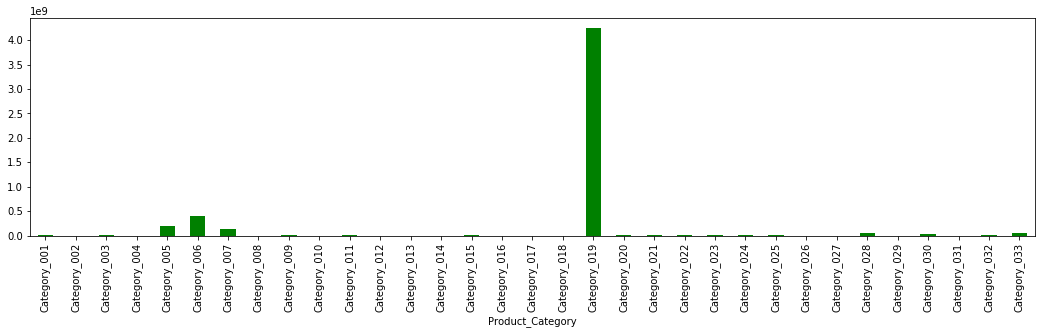

In [75]:
cwd_df.plot.bar(color = 'green',figsize=(18, 4))

From this plot and discussion we found that the demand of the Category_019 is highest

### **Warehouse wise demand** <br>
---
Let's check, which warehouse is producing highest number of demand 

In [76]:
whd_df = hpd_df.groupby("Warehouse")['Order_Demand'].sum()
whd_df.head()

Warehouse
Whse_A    1.478774e+08
Whse_C    5.850714e+08
Whse_J    3.363200e+09
Whse_S    1.038025e+09
Name: Order_Demand, dtype: float64

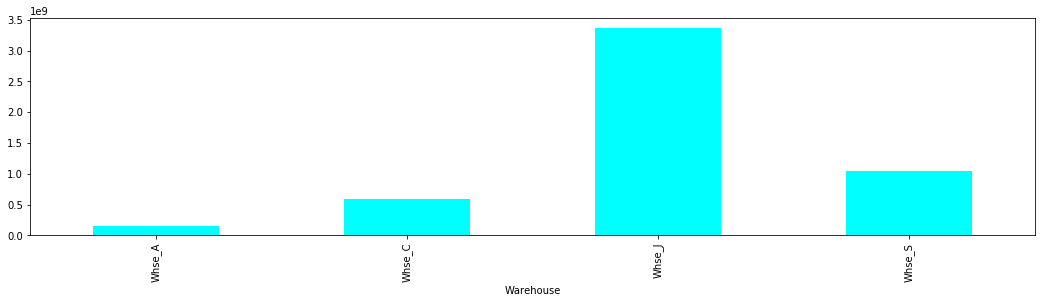

In [77]:
whd_df.plot.bar(color = 'Cyan',figsize=(18, 4))

From this grouping and summation we found most of the order are placed at warehouse J 

### Data Conversion to Numerical representation 
--- 

There is a date field, which is important to determine the product forecasting. 

In [78]:
def year(data):
    array = str(data).split("/")
    return array[0]
def month(data):
    array = str(data).split("/")
    return array[1]
def day(data):
    array = str(data).split("/")
    return array[2]

In [79]:
hpd_df['Year'] = hpd_df['Date'].apply(year).astype(float)
hpd_df['Month'] = hpd_df['Date'].apply(month).astype(float)
hpd_df['Day'] = hpd_df['Date'].apply(day).astype(float)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0,2012.0,7.0,27.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0,2012.0,1.0,19.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0,2012.0,2.0,3.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0,2012.0,2.0,9.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0,2012.0,3.0,2.0


#### Removing the Original Date field 

In [80]:
cols = ['Product_Code','Warehouse','Product_Category','Order_Demand','Year','Month','Day']
hpd_df = hpd_df.filter(items = cols)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,100.0,2012.0,7.0,27.0
1,Product_0979,Whse_J,Category_028,500.0,2012.0,1.0,19.0
2,Product_0979,Whse_J,Category_028,500.0,2012.0,2.0,3.0
3,Product_0979,Whse_J,Category_028,500.0,2012.0,2.0,9.0
4,Product_0979,Whse_J,Category_028,500.0,2012.0,3.0,2.0


#### Converting Product and Product Category to Numerical value by separating by _

In [81]:
def product_code_update(data):
    return str(data).replace('Product_',"")

In [82]:
hpd_df['Product_Code'] = hpd_df['Product_Code'].apply(product_code_update).astype(float)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,Whse_J,Category_028,100.0,2012.0,7.0,27.0
1,979.0,Whse_J,Category_028,500.0,2012.0,1.0,19.0
2,979.0,Whse_J,Category_028,500.0,2012.0,2.0,3.0
3,979.0,Whse_J,Category_028,500.0,2012.0,2.0,9.0
4,979.0,Whse_J,Category_028,500.0,2012.0,3.0,2.0


In [83]:
def category_code_update(data):
    return str(data).replace("Category_","")

In [84]:
hpd_df['Product_Category'] = hpd_df['Product_Category'].apply(category_code_update).astype(float)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,Whse_J,28.0,100.0,2012.0,7.0,27.0
1,979.0,Whse_J,28.0,500.0,2012.0,1.0,19.0
2,979.0,Whse_J,28.0,500.0,2012.0,2.0,3.0
3,979.0,Whse_J,28.0,500.0,2012.0,2.0,9.0
4,979.0,Whse_J,28.0,500.0,2012.0,3.0,2.0


In [85]:
hpd_df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

There are only **Four** types Warehouse we can mannually change them to numerical value. 

In [86]:
def warehouse_update(data):
    if data=="Whse_A":
        return 1
    elif data =="Whse_C":
        return 2
    elif data == "Whse_J":
        return 3
    else:
        return 4

In [87]:
hpd_df['Warehouse'] = hpd_df['Warehouse'].apply(warehouse_update)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,3,28.0,100.0,2012.0,7.0,27.0
1,979.0,3,28.0,500.0,2012.0,1.0,19.0
2,979.0,3,28.0,500.0,2012.0,2.0,3.0
3,979.0,3,28.0,500.0,2012.0,2.0,9.0
4,979.0,3,28.0,500.0,2012.0,3.0,2.0


## Lets Check Yearwise demand 
---

Lets groupby year and check the output. It will give us trending of the market in terms of demand.

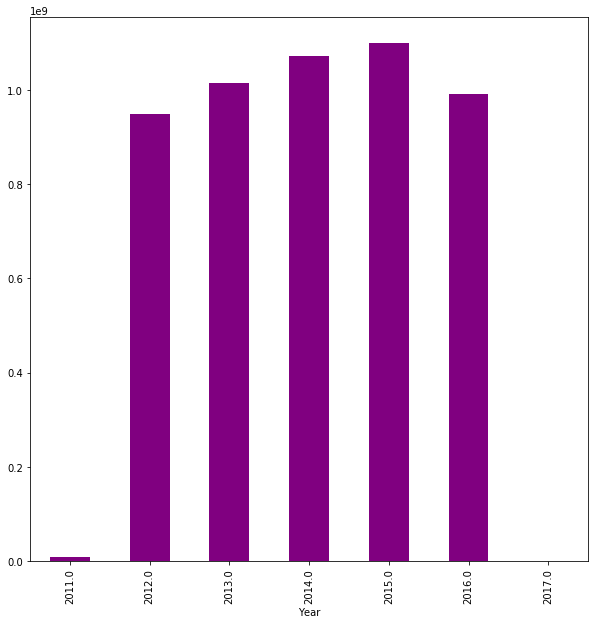

In [88]:
ypd = hpd_df.groupby('Year')['Order_Demand'].sum()
ypd.plot.bar(color='purple')

In [89]:
yppd = hpd_df.groupby(['Year','Product_Category'])['Order_Demand'].sum()
yppd.head()

Year    Product_Category
2011.0  1.0                    997.0
        3.0                   1708.0
        4.0                   2780.0
        5.0                 673750.0
        6.0                 490509.0
Name: Order_Demand, dtype: float64

## Features' Relationship / HeatMap
----

Lets plot a heatmap between features and see the inter relationship 

In [90]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 10,10
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
    plt.show()
    fig.savefig('corr.png')

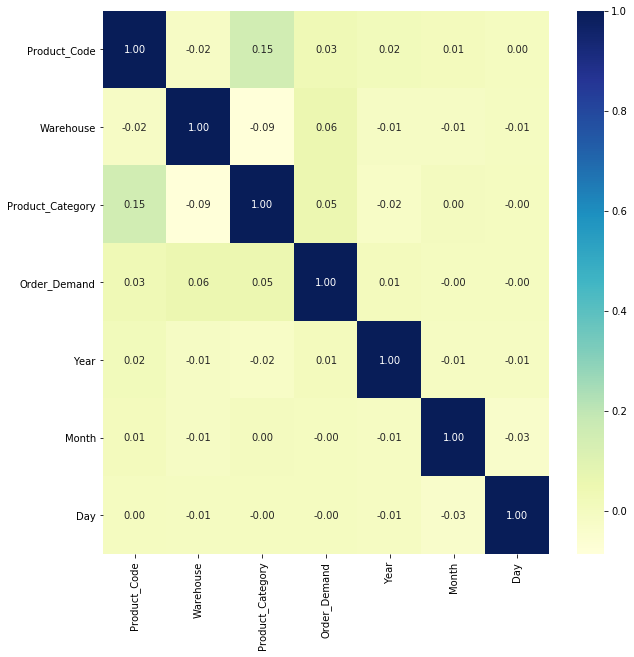

In [91]:
plot_correlation(hpd_df)

### Filtering to Single Product As per Problem Statement. 
---

In [92]:
p1359 = hpd_df[hpd_df.Product_Code==1359.0]
p1359.describe()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
count,16936.0,16936.0,16936.0,1.693600e+04,16936.000000,16936.000000,16936.000000
mean,1359.0,3.0,19.0,2.789761e+04,2013.868446,6.422296,15.440364
std,0.0,0.0,0.0,6.964769e+04,1.396036,3.458299,8.900565
min,1359.0,3.0,19.0,0.000000e+00,2012.000000,1.000000,1.000000
25%,1359.0,3.0,19.0,3.000000e+03,2013.000000,3.000000,8.000000
50%,1359.0,3.0,19.0,1.000000e+04,2014.000000,6.000000,16.000000
75%,1359.0,3.0,19.0,2.500000e+04,2015.000000,9.000000,23.000000
max,1359.0,3.0,19.0,2.000000e+06,2017.000000,12.000000,31.000000


In [93]:
p1359.Warehouse.unique()

array([3])

In [94]:
p1359.Product_Category.unique()

array([19.])

It means there is no variation in the fields **Product_Code, Warehouse, Product_Category**. Lets drop them

In [103]:
cols = ['Order_Demand','Year','Month','Day']
p1359 = p1359.filter(items = cols).astype(int)
p1359.head()

,Order_Demand,Year,Month,Day
276,80000,2012,4,18
282,70000,2012,5,21
289,80000,2012,6,26
292,100000,2012,7,17
296,100000,2012,8,24


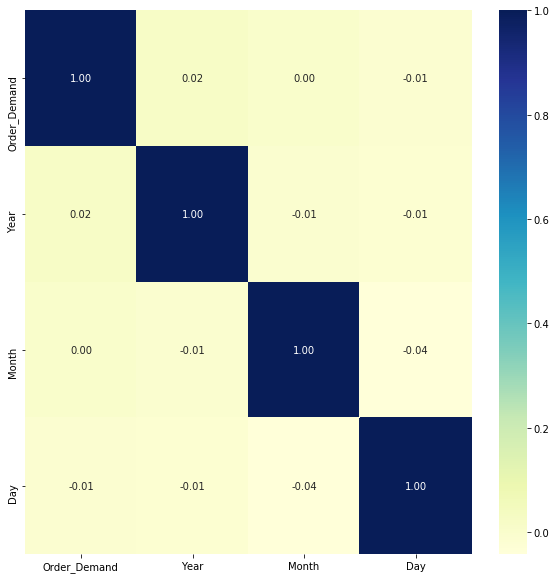

In [104]:
plot_correlation(p1359)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff486896ed0>,
      dtype=object)

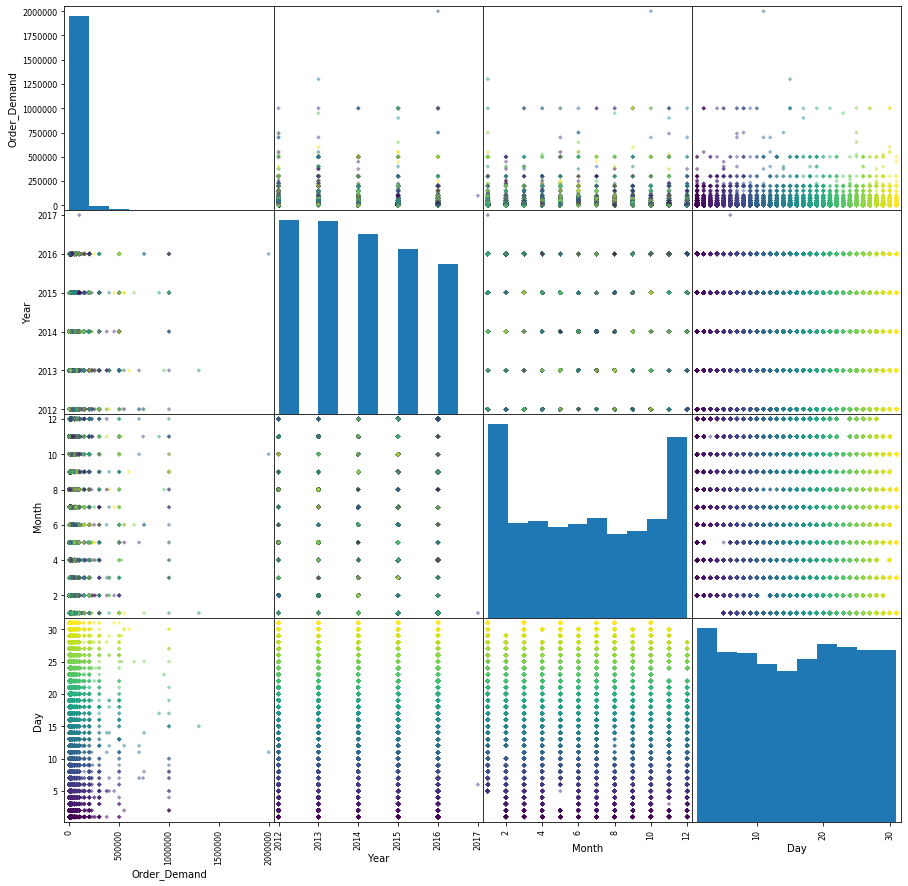

In [105]:
pd.plotting.scatter_matrix(p1359, c=p1359['Day'], figsize = [15,15],s=10, marker = 'D')

# Conversion in test/train data and Modeling 
----------
**********

### Lets make 70,30 train test data set 

In [109]:
#Separating target column at first 
feature_columns = ['Year','Month','Day']
target_columns=['Order_Demand']

# Retaining required columns in each DF 
feature_df = p1359[feature_columns]
target_df = p1359[target_columns]

x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,train_size=0.7,test_size=0.3,random_state=123)

### Linear Regression 

In [110]:
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# make a prediction
y_pred = model.predict(x_test)
# summarize prediction
pred_df = pd.DataFrame(data=y_pred, columns=["Order_Demand_Pred"])
pred_df.head()

,Order_Demand_Pred
0,30834.326155
1,28857.570506
2,25597.577264
3,32369.700213
4,30081.000541


In [111]:
y_test.head()

,Order_Demand
674602,20000
651138,1000
55270,5000
875194,4000
686174,2000
